# PHQ ANALYSIS
### Do individuals have higher PHQ-9 scores, indicating more severe depressive symptoms, during the winter season compared to other seasons?
> ### Does time of day (morning, midday, or evening) affect the total score?
> ### Does age affect the total score?
> ### Does gender affect the total score?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#creating dataframe from dataset (.csv) file and displaying the first 5 rows
path = 'PHQ9 data.csv'
original_df = pd.read_csv(path)
#displaying head of df
original_df.head()

,Unnamed: 0,user_id,phq1,phq2,phq3,phq4,phq5,phq6,phq7,phq8,...,q14,q16,q46,q47,happiness.score,time,period.name,start.time,phq.day,id
0,1,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,0.0,NaN,NaN,NaN,2,2017-01-22 20:11:59,evening,2017-01-09 07:22:37,-0.951921,1
1,2,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,NaN,NaN,1.0,NaN,3,2017-02-08 22:53:06,evening,2017-01-09 07:22:37,16.159965,1
2,3,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,NaN,NaN,NaN,NaN,3,2017-02-08 08:00:46,morning,2017-01-09 07:22:37,15.540289,1
3,4,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,NaN,1.0,NaN,NaN,2,2017-01-22 14:01:25,midday,2017-01-09 07:22:37,-1.209259,1
4,5,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,1.0,NaN,1.0,NaN,2,2017-01-21 15:37:24,midday,2017-01-09 07:22:37,-2.142604,1


In [4]:
#dropping repeated columns and columns not related to our analysis
dropped_df = original_df.drop(columns=['Unnamed: 0', 'id', 'phq.day', 'start.time', 
                                       'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 
                                       'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q16', 'q46', 'q47'])
#displaying head of df
dropped_df.head()

,user_id,phq1,phq2,phq3,phq4,phq5,phq6,phq7,phq8,phq9,age,sex,happiness.score,time,period.name
0,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2,2017-01-22 20:11:59,evening
1,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,3,2017-02-08 22:53:06,evening
2,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,3,2017-02-08 08:00:46,morning
3,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2,2017-01-22 14:01:25,midday
4,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2,2017-01-21 15:37:24,midday


In [5]:
#creating empty lists to append information to then add as columns to new df
total_scores = []
depression_severity = []
season = []
#looping through dropped_df
for index, row in dropped_df.iterrows():
    #calculating total score for each row and appending to the total_scores list
    total_score = row['phq1'] + row['phq2'] + row['phq3'] + row['phq4'] + row['phq5'] + row['phq6'] + row['phq7'] + row['phq8'] + row['phq9']
    total_scores.append(total_score)
    
    #determining depression severity based on the total score and appending to the depression_severity list
    if pd.isna(total_score):
        depression_severity.append(np.nan)
    elif total_score <= 4:
        depression_severity.append('minimal')
    elif total_score <= 9:
        depression_severity.append('mild')
    elif total_score <= 14:
        depression_severity.append('moderate')
    elif total_score <= 19:
        depression_severity.append('moderately severe')
    else:
        depression_severity.append('severe')
    
    #finding the season based on the time column in dropped_df and appending the season to the season list
    date = row['time'].split()
    year_month_day = date[0].split('-')
    if year_month_day[1] == '12' or  year_month_day[1] == '01' or year_month_day[1] == '02':
        season.append('winter')
    elif year_month_day[1] == '03' or  year_month_day[1] == '04' or year_month_day[1] == '05':
        season.append('spring')
    elif year_month_day[1] == '06' or  year_month_day[1] == '07' or year_month_day[1] == '08':
        season.append('summer')
    else: 
        season.append('fall')
#creating a new df for the column additions
total_scores_df = dropped_df
#adding a total.score, depression.severity, and season column to total_scores_df
total_scores_df['total.score'] = total_scores
total_scores_df['depression.severity'] = depression_severity
total_scores_df['season'] = season
#reordering columns for readability
total_scores_df = total_scores_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,15,16,10,11,12,13,17,14]]
#displaying head of new df
total_scores_df.head()

,user_id,phq1,phq2,phq3,phq4,phq5,phq6,phq7,phq8,phq9,total.score,depression.severity,age,sex,happiness.score,time,season,period.name
0,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2,2017-01-22 20:11:59,winter,evening
1,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,3,2017-02-08 22:53:06,winter,evening
2,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,3,2017-02-08 08:00:46,winter,morning
3,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2,2017-01-22 14:01:25,winter,midday
4,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2,2017-01-21 15:37:24,winter,midday


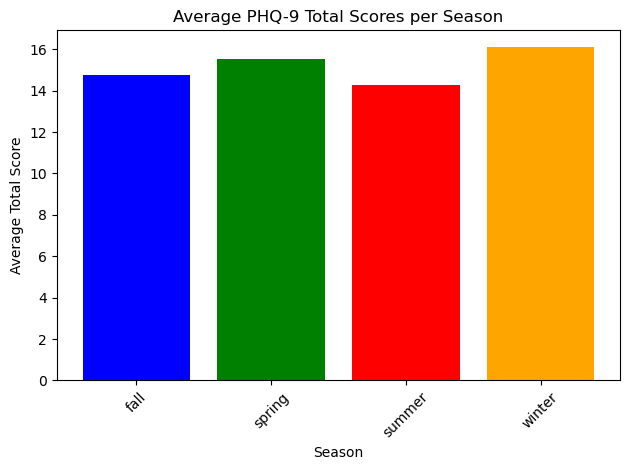

In [14]:
# Group the data by season and calculate the mean of total scores for each season
season_scores = total_scores_df.groupby('season')['total.score'].mean().reset_index()

# Plotting the bar graph
plt.bar(season_scores['season'], season_scores['total.score'], color=['blue', 'green', 'red', 'orange'])
plt.title('Average PHQ-9 Total Scores per Season')
plt.xlabel('Season')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the figure neatly

# Show the plot
plt.show()

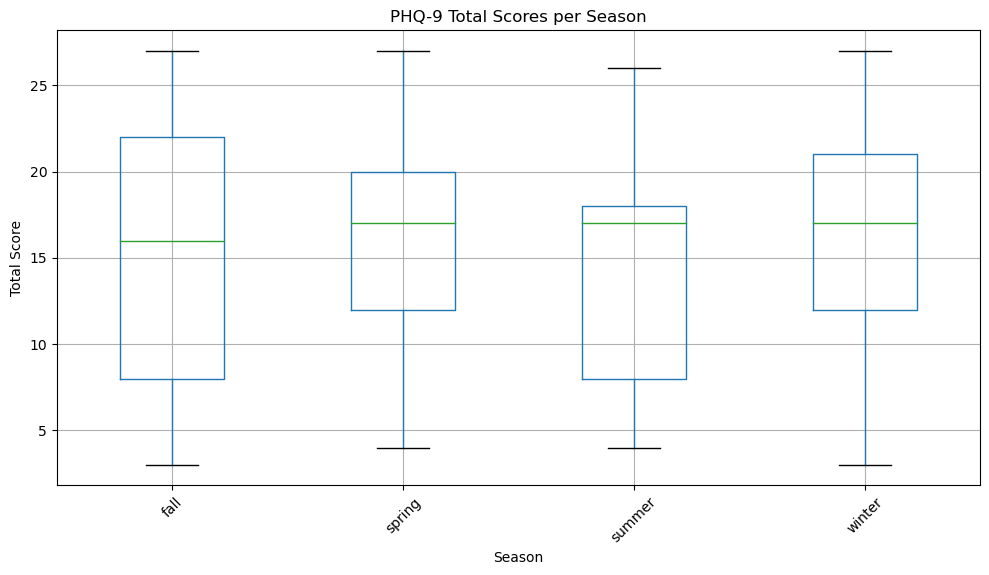

In [21]:
# Plotting the box plot for total scores per season
total_scores_df.boxplot(column='total.score', by='season', figsize=(10,6))

plt.title('PHQ-9 Total Scores per Season')
plt.suptitle('')  # Suppress the automatic "Boxplot grouped by season" title
plt.xlabel('Season')
plt.ylabel('Total Score')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the figure neatly

# Show the plot
plt.show()

In [8]:
#statistics grouped by season then user
agg_df = total_scores_df.groupby(['season', 'user_id'])[['total.score']].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index().rename(columns={0:'n'})
agg_df.head()

season user_id total.score                      
                        mean median  var  std  sem
0   fall       2        24.0   24.0  0.0  0.0  0.0
1   fall       4        17.0   17.0  0.0  0.0  0.0
2   fall       6        18.0   18.0  0.0  0.0  0.0
3   fall       7        23.0   23.0  0.0  0.0  0.0
4   fall       9         9.0    9.0  0.0  0.0  0.0

In [10]:
# Calculating the number of unique user IDs in the dataset
unique_user_ids = total_scores_df['user_id'].nunique()
unique_user_ids

185

In [11]:
# Counting how many unique people took the test in each season
people_per_season = total_scores_df.groupby('season')['user_id'].nunique()
people_per_season


season
fall       26
spring     47
summer     18
winter    185
Name: user_id, dtype: int64

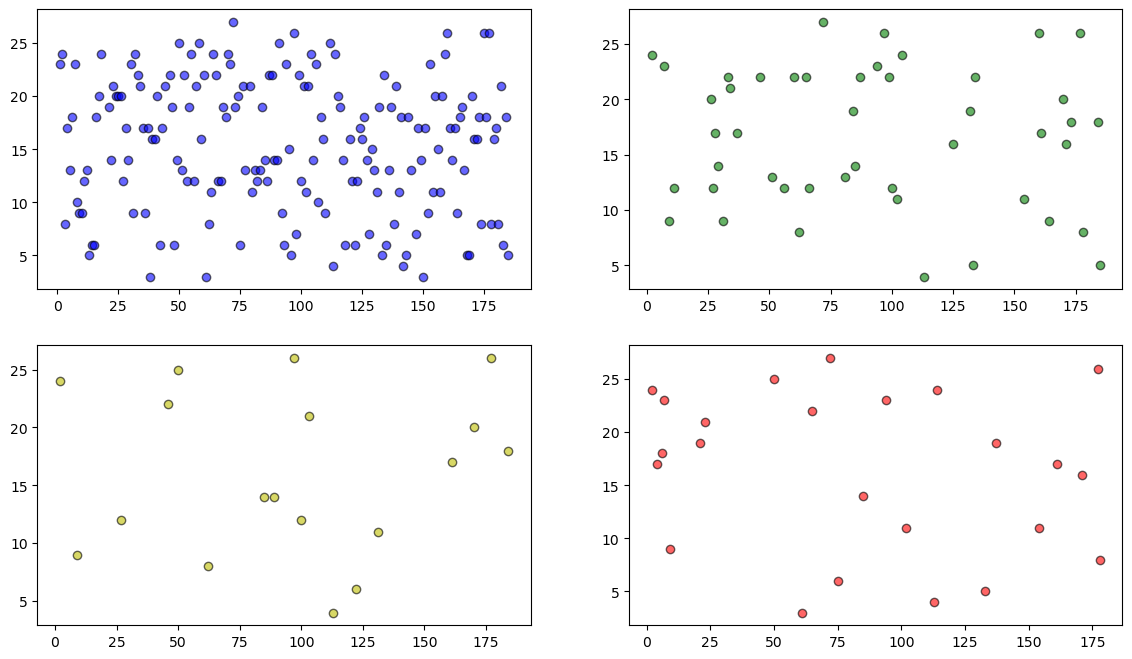

In [31]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
season_data = total_scores_df[total_scores_df['season'] == 'winter']
plt.scatter(agg_df.loc[agg_df['season'] == 'winter']['user_id'], agg_df.loc[agg_df['season'] == 'winter']['total.score']['mean'],
            alpha=0.6, label=season.capitalize(), color='b', edgecolor='black', marker='o')
plt.subplot(2, 2, 2)
season_data = total_scores_df[total_scores_df['season'] == 'spring']
plt.scatter(agg_df.loc[agg_df['season'] == 'spring']['user_id'], agg_df.loc[agg_df['season'] == 'spring']['total.score']['mean'],
            alpha=0.6, label=season.capitalize(), color='g', edgecolor='black', marker='o')
plt.subplot(2, 2, 3)
season_data = total_scores_df[total_scores_df['season'] == 'summer']
plt.scatter(agg_df.loc[agg_df['season'] == 'summer']['user_id'], agg_df.loc[agg_df['season'] == 'summer']['total.score']['mean'],
            alpha=0.6, label=season.capitalize(), color='y', edgecolor='black', marker='o')
plt.subplot(2, 2, 4)
season_data = total_scores_df[total_scores_df['season'] == 'fall']
plt.scatter(agg_df.loc[agg_df['season'] == 'fall']['user_id'], agg_df.loc[agg_df['season'] == 'fall']['total.score']['mean'], 
            alpha=0.6, label=season.capitalize(), color='r', edgecolor='black', marker='o')
plt.show()

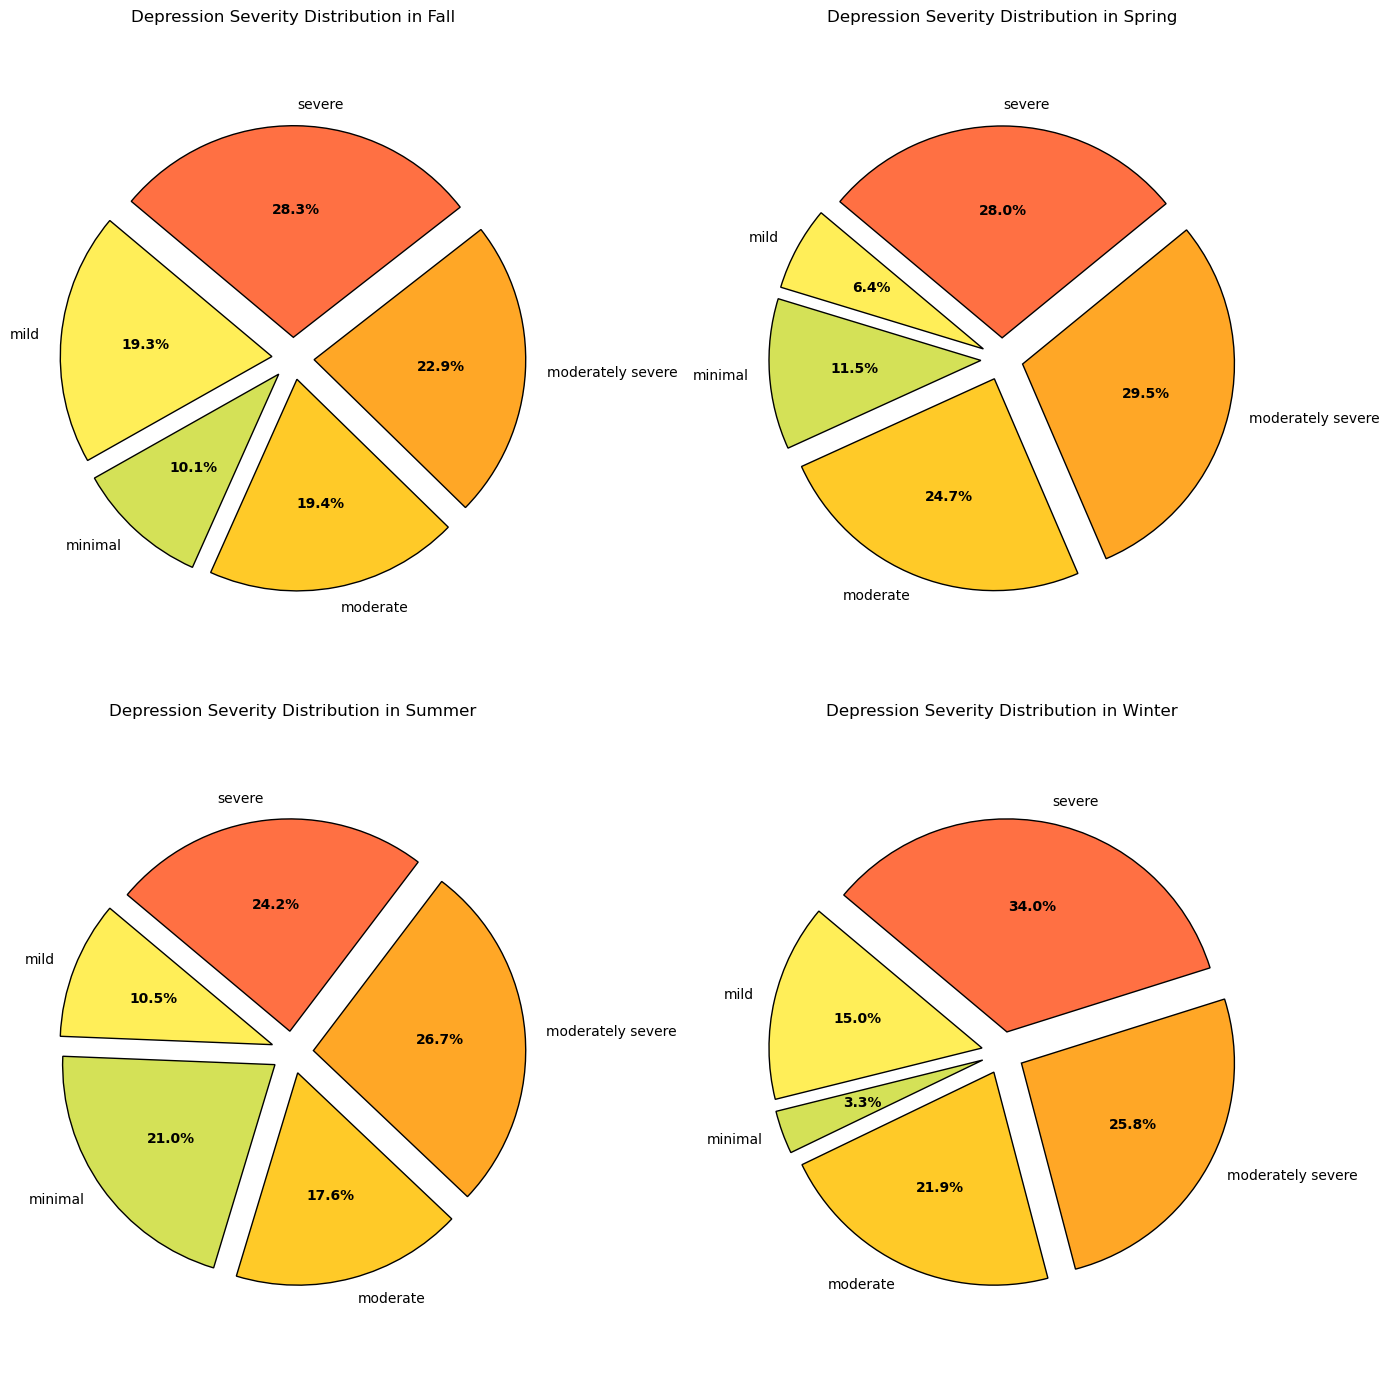

In [18]:
# First, we will count the number of tests taken in each season divided by depression severity
severity_counts_per_season = total_scores_df.groupby('season')['depression.severity'].value_counts().unstack(fill_value=0)

# Define a small gap to separate the pie chart segments
explode_gap = 0.1  # this will separate the slices a little

# Define colors for each severity level, which will be the same across all seasons for consistency
severity_colors = {
    'minimal': '#d4e157',
    'mild': '#ffee58',
    'moderate': '#ffca28',
    'moderately severe': '#ffa726',
    'severe': '#ff7043'
}

# Create subplots for the pie charts
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Loop over each season and create a pie chart with separated segments
for i, (season, counts) in enumerate(severity_counts_per_season.iterrows()):
    ax = axes[i//2, i%2]
    colors = [severity_colors[severity] for severity in counts.index]
    # Explode all segments a little bit
    explode = [explode_gap] * len(counts)
    wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, 
                                      colors=colors, explode=explode, wedgeprops=dict(linewidth=1, edgecolor='black'))

    # Bold the percentage texts
    for autotext in autotexts:
        autotext.set_weight('bold')

    ax.set_title(f'Depression Severity Distribution in {season.capitalize()}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so there's no overlap
plt.tight_layout()

# Show the plots
plt.show()

In [6]:
#testing access to the agg_df
agg_df.loc[agg_df['season'] == 'fall']['total.score']['mean']

0     24.0
1     17.0
2     18.0
3     23.0
4      9.0
5      NaN
6     19.0
7     21.0
8     25.0
9      3.0
10    22.0
11    27.0
12     6.0
13    14.0
14    23.0
15    11.0
16     4.0
17    24.0
18     5.0
19    19.0
20     NaN
21    11.0
22    17.0
23    16.0
24    26.0
25     8.0
Name: mean, dtype: float64

In [203]:
#Do individuals have higher PHQ-9 scores, indicating more severe depressive symptoms, 
#during the winter months compared to the summer months?

In [204]:
#Which questions have higher scores during different seasons?
    #winter: December, January, February
    #spring: March, April, May
    #summer: June, July, August
    #fall: September, October, November

In [205]:
#Does age affect the score?

In [206]:
#Does gender affect the score?

In [27]:
total_scores_df['age'].unique() #12, 14, 17, 19 AND 20 - 35 AND 36+ 

array([nan, 22., 17., 24., 16., 26., 25., 29., 41., 34., 28., 51., 23.,
       27., 15., 21., 12., 20., 33., 32., 14., 43., 19., 18., 38., 35.,
       45., 46., 57., 30., 56., 39., 31., 47., 36., 42., 40., 48., 49.])

In [25]:
total_scores_df['sex'].value_counts()

sex
female         10882
male            3868
transgender       90
Name: count, dtype: int64

In [39]:
agg_df_gender = total_scores_df.groupby(['season', 'sex'])[['total.score']].agg(['mean', 'median']).reset_index().rename(columns={0:'n'})
agg_df_gender

season          sex total.score       
                               mean median
0     fall       female   17.036606   17.0
1     fall         male   13.727823   11.0
2     fall  transgender    8.000000    8.0
3   spring       female   17.469557   17.0
4   spring         male   12.469919   11.0
5   spring  transgender    8.000000    8.0
6   summer       female   17.559524   17.0
7   summer         male    9.003333    4.0
8   winter       female   16.860808   18.0
9   winter         male   14.545788   16.0
10  winter  transgender    8.000000    8.0

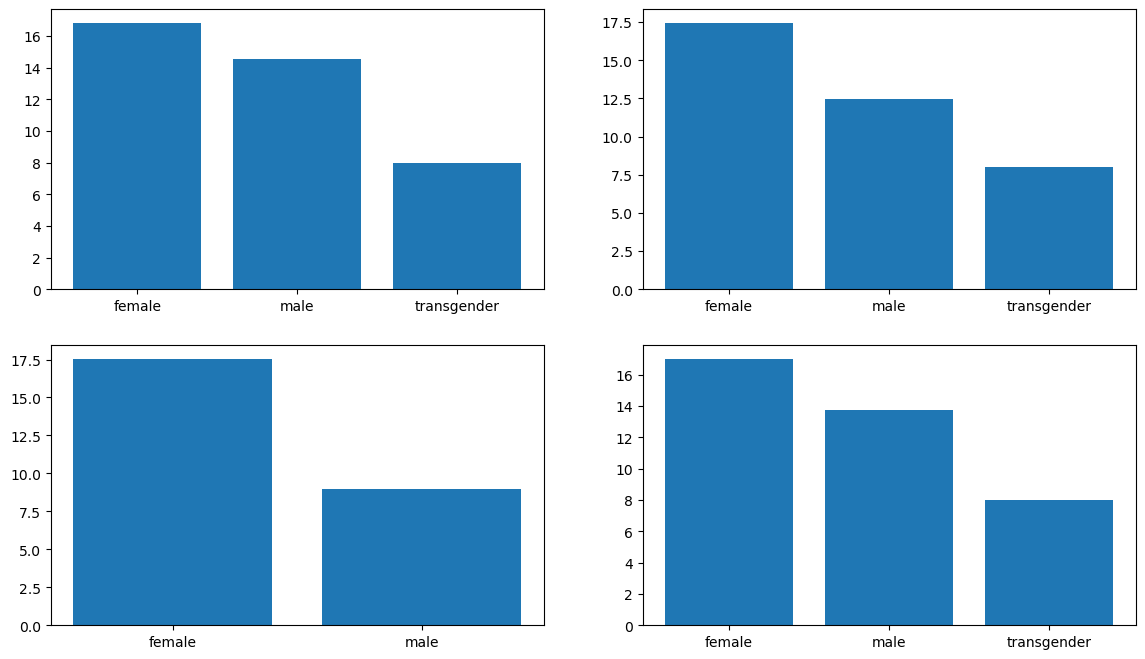

In [41]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
plt.bar(agg_df_gender.loc[agg_df_gender['season'] == 'winter']['sex'], 
        agg_df_gender.loc[agg_df_gender['season'] == 'winter']['total.score']['mean'])
plt.subplot(2, 2, 2)
plt.bar(agg_df_gender.loc[agg_df_gender['season'] == 'spring']['sex'],
        agg_df_gender.loc[agg_df_gender['season'] == 'spring']['total.score']['mean'])
plt.subplot(2, 2, 3)
plt.bar(agg_df_gender.loc[agg_df_gender['season'] == 'summer']['sex'],
        agg_df_gender.loc[agg_df_gender['season'] == 'summer']['total.score']['mean'])
plt.subplot(2, 2, 4)
plt.bar(agg_df_gender.loc[agg_df_gender['season'] == 'fall']['sex'],
        agg_df_gender.loc[agg_df_gender['season'] == 'fall']['total.score']['mean'])
plt.show()

In [45]:
total_scores_df['age'].value_counts()

age
36.0    1039
39.0     763
17.0     738
25.0     435
22.0     418
28.0     413
21.0     395
20.0     392
47.0     389
15.0     345
34.0     333
18.0     323
32.0     291
33.0     286
31.0     239
23.0     222
29.0     217
24.0     213
30.0     206
48.0     203
26.0     182
16.0     169
27.0     164
14.0     145
51.0     123
57.0     119
43.0     114
38.0     112
19.0     101
12.0      87
35.0      86
56.0      76
46.0      72
45.0      71
42.0      59
40.0      59
49.0      53
41.0      42
Name: count, dtype: int64

In [47]:
agg_df_time = total_scores_df.groupby(['season', 'period.name'])[['total.score']].agg(['mean', 'median']).reset_index().rename(columns={0:'n'})
agg_df_time

season period.name total.score       
                              mean median
0     fall     evening   14.841743   16.0
1     fall      midday   14.556410   14.0
2     fall     morning   14.885942   17.0
3   spring     evening   15.520408   17.0
4   spring      midday   15.493506   17.0
5   spring     morning   15.510516   17.0
6   summer     evening   14.278638   17.0
7   summer      midday   14.070896   14.0
8   summer     morning   14.451883   17.0
9   winter     evening   16.045200   17.0
10  winter      midday   16.162578   17.0
11  winter     morning   16.141489   17.0

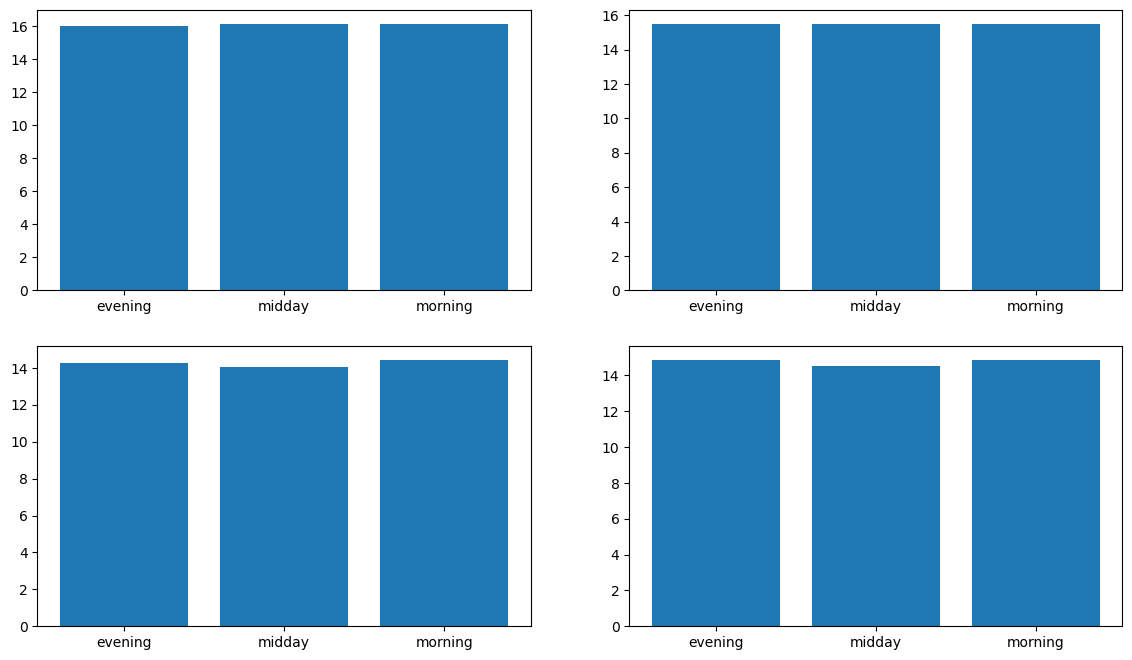

In [48]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
plt.bar(agg_df_time.loc[agg_df_time['season'] == 'winter']['period.name'], 
        agg_df_time.loc[agg_df_time['season'] == 'winter']['total.score']['mean'])
plt.subplot(2, 2, 2)
plt.bar(agg_df_time.loc[agg_df_time['season'] == 'spring']['period.name'],
        agg_df_time.loc[agg_df_time['season'] == 'spring']['total.score']['mean'])
plt.subplot(2, 2, 3)
plt.bar(agg_df_time.loc[agg_df_time['season'] == 'summer']['period.name'],
        agg_df_time.loc[agg_df_time['season'] == 'summer']['total.score']['mean'])
plt.subplot(2, 2, 4)
plt.bar(agg_df_time.loc[agg_df_time['season'] == 'fall']['period.name'],
        agg_df_time.loc[agg_df_time['season'] == 'fall']['total.score']['mean'])
plt.show()

In [60]:
teen = total_scores_df.loc[total_scores_df['age'] <= 19]['age'] # <20
young_adult = total_scores_df.loc[(total_scores_df['age'] > 19) & (total_scores_df['age'] <= 30)]['age'] # 20 - 30
older_adult = total_scores_df.loc[total_scores_df['age'] > 30]['age'] #30+

In [63]:
agg_df_teen = total_scores_df.groupby(['season', teen])[['total.score']].agg(['mean', 'median']).reset_index().rename(columns={0:'n'})
agg_df_teen.head()

season   age total.score       
                       mean median
0    fall  15.0   16.000000   16.0
1    fall  16.0   23.000000   23.0
2    fall  17.0   17.828283   17.0
3  spring  15.0   16.300000   16.0
4  spring  16.0   23.000000   23.0

In [64]:
agg_df_young_adult = total_scores_df.groupby(['season', young_adult])[['total.score']].agg(['mean', 'median']).reset_index().rename(columns={0:'n'})
agg_df_young_adult.head()

season   age total.score       
                      mean median
0   fall  22.0        11.0   11.0
1   fall  24.0        18.0   18.0
2   fall  25.0         9.0    9.0
3   fall  26.0        14.0   14.0
4   fall  28.0         8.0    8.0

In [65]:
agg_df_older_adult = total_scores_df.groupby(['season', older_adult])[['total.score']].agg(['mean', 'median']).reset_index().rename(columns={0:'n'})
agg_df_older_adult.head()

season   age total.score       
                       mean median
0    fall  36.0        17.0   17.0
1    fall  39.0         4.0    4.0
2    fall  43.0        25.0   25.0
3    fall  47.0        11.0   11.0
4  spring  31.0        16.0   16.0

In [67]:
plt.bar(agg_df_teen['season'], 
        agg_df_teen['age']['total.score']['mean'])

KeyError: 'total.score'

In [ ]:
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.bar(agg_df_teen.loc[agg_df_teen['season'] == 'winter']['period.name'], 
        agg_df_teen.loc[agg_df_teen['season'] == 'winter']['total.score']['mean'])
plt.subplot(3, 1, 2)
plt.bar(agg_df_time.loc[agg_df_time['season'] == 'spring']['period.name'],
        agg_df_time.loc[agg_df_time['season'] == 'spring']['total.score']['mean'])
plt.subplot(3, 1, 3)
plt.bar(agg_df_time.loc[agg_df_time['season'] == 'summer']['period.name'],
        agg_df_time.loc[agg_df_time['season'] == 'summer']['total.score']['mean'])
plt.show()